In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print("Libraries imported successfully.")
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Libraries imported successfully.
Pandas version: 2.1.0
Matplotlib version: 3.8.0
Seaborn version: 0.13.0


In [5]:
df = pd.read_csv("D:\Internship\PRODIGY\Task1\API_SP.POP.TOTL_DS2_en_csv_v2_575966.csv", skiprows=4)
print("Dataset loaded successfully")

Dataset loaded successfully


In [6]:
print("DATASET INFORMATION:")
print("=" * 50)
print(f"Shape: {df.shape} (rows, columns)")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values per column:")
print(df.isnull().sum())

DATASET INFORMATION:
Shape: (266, 70) (rows, columns)

Column names:
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']

Data types:
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2021              float64
2022              float64
2023              float64
2024              float64
Unnamed: 69       float64
Length: 70, dtype: object

M

In [7]:
print("DATA CLEANING STEPS:")
print("=" * 40)

# 1. Drop the unnecessary column
df = df.drop(columns=['Unnamed: 69'], errors='ignore')
print("1. Dropped unnecessary 'Unnamed: 69' column")

# 2. Check what indicator we have
print(f"\n2. Indicator in dataset: {df['Indicator Name'].iloc[0]}")

# 3. Let's see some sample countries
print(f"\n3. Sample countries:")
print(df['Country Name'].head(10).tolist())

# 4. Get the latest available year with good data (let's use 2020)
latest_year = '2020'
print(f"\n4. Using population data from year: {latest_year}")

# Check how many countries have data for 2020
non_null_2020 = df[latest_year].notnull().sum()
print(f"   Countries with {latest_year} data: {non_null_2020}/{len(df)}")

# Show the cleaned dataset info
print(f"\nFinal dataset shape: {df.shape}")

DATA CLEANING STEPS:
1. Dropped unnecessary 'Unnamed: 69' column

2. Indicator in dataset: Population, total

3. Sample countries:
['Aruba', 'Africa Eastern and Southern', 'Afghanistan', 'Africa Western and Central', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina']

4. Using population data from year: 2020
   Countries with 2020 data: 265/266

Final dataset shape: (266, 69)


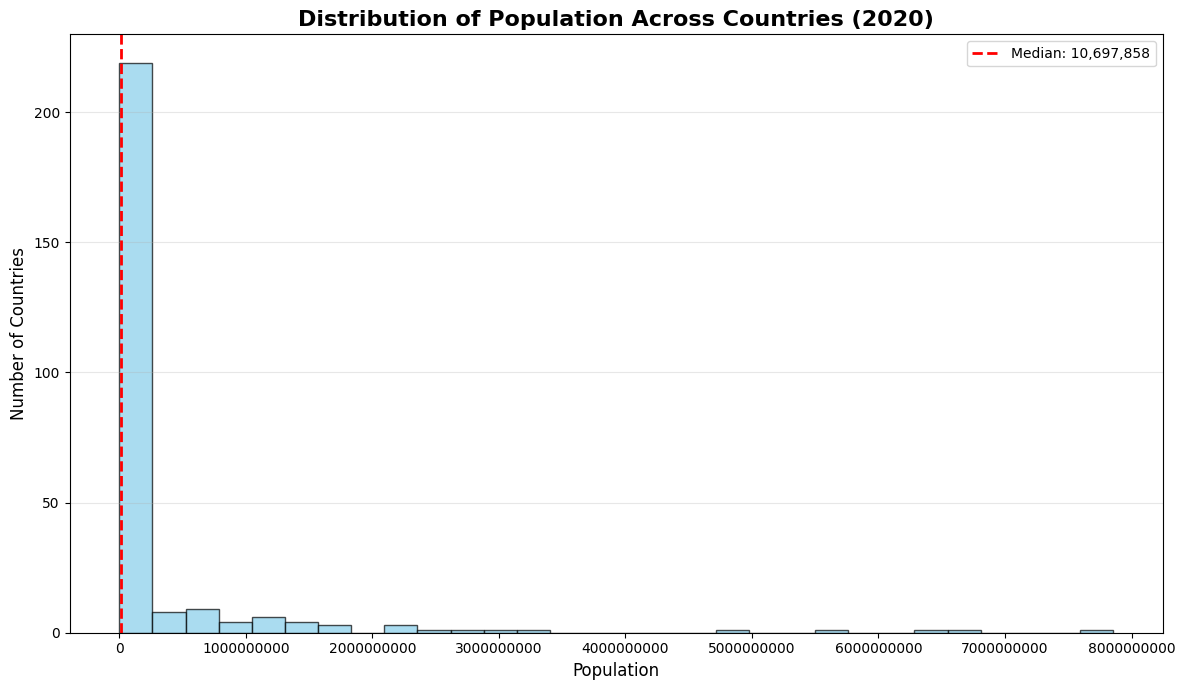

POPULATION STATISTICS FOR 2020:
Total countries with data: 265
Mean population: 318,796,746
Median population: 10,697,858
Minimum population: 10,399
Maximum population: 7,855,075,060
Standard deviation: 986,602,464


In [8]:
#histogram of population distribution for 2020
plt.figure(figsize=(12, 7))

plt.hist(df['2020'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(df['2020'].median(), color='red', linestyle='--', linewidth=2, 
            label=f'Median: {df["2020"].median():,.0f}')

plt.title('Distribution of Population Across Countries (2020)', fontsize=16, fontweight='bold')
plt.xlabel('Population', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.legend()

plt.grid(axis='y', alpha=0.3)
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

print("POPULATION STATISTICS FOR 2020:")
print("=" * 40)
print(f"Total countries with data: {df['2020'].notnull().sum()}")
print(f"Mean population: {df['2020'].mean():,.0f}")
print(f"Median population: {df['2020'].median():,.0f}")
print(f"Minimum population: {df['2020'].min():,.0f}")
print(f"Maximum population: {df['2020'].max():,.0f}")
print(f"Standard deviation: {df['2020'].std():,.0f}")

In [12]:
print("FIRST 50 ENTRIES IN THE DATASET:")
print("=" * 40)
for i, country in enumerate(df['Country Name'].head(50), 1):
    print(f"{i:2d}. {country}")

print(f"\nSAMPLE OF ENTRIES (every 10th):")
print("=" * 35)
for i in range(0, len(df), 10):
    print(f"{i:3d}. {df['Country Name'].iloc[i]}")

FIRST 50 ENTRIES IN THE DATASET:
 1. Aruba
 2. Africa Eastern and Southern
 3. Afghanistan
 4. Africa Western and Central
 5. Angola
 6. Albania
 7. Andorra
 8. Arab World
 9. United Arab Emirates
10. Argentina
11. Armenia
12. American Samoa
13. Antigua and Barbuda
14. Australia
15. Austria
16. Azerbaijan
17. Burundi
18. Belgium
19. Benin
20. Burkina Faso
21. Bangladesh
22. Bulgaria
23. Bahrain
24. Bahamas, The
25. Bosnia and Herzegovina
26. Belarus
27. Belize
28. Bermuda
29. Bolivia
30. Brazil
31. Barbados
32. Brunei Darussalam
33. Bhutan
34. Botswana
35. Central African Republic
36. Canada
37. Central Europe and the Baltics
38. Switzerland
39. Channel Islands
40. Chile
41. China
42. Cote d'Ivoire
43. Cameroon
44. Congo, Dem. Rep.
45. Congo, Rep.
46. Colombia
47. Comoros
48. Cabo Verde
49. Costa Rica
50. Caribbean small states

SAMPLE OF ENTRIES (every 10th):
  0. Aruba
 10. Armenia
 20. Bangladesh
 30. Barbados
 40. China
 50. Cuba
 60. Algeria
 70. Spain
 80. Gabon
 90. Grenada
100.

In [13]:
print("COUNTRY CODE EXAMPLES:")
print("=" * 25)
print("Actual countries typically have 3-letter codes, regions have special codes")

sample_codes = df[['Country Name', 'Country Code']].head(20)
print(sample_codes.to_string(index=False))

countries_df = df[df['Country Code'].str.len() == 3].copy()

print(f"\nTotal actual countries (3-letter codes): {len(countries_df)}")
print(f"Total entries in dataset: {len(df)}")

print(f"\nFIRST 20 ACTUAL COUNTRIES:")
print("=" * 25)
for i, country in enumerate(countries_df['Country Name'].head(20), 1):
    print(f"{i:2d}. {country}")

COUNTRY CODE EXAMPLES:
Actual countries typically have 3-letter codes, regions have special codes
               Country Name Country Code
                      Aruba          ABW
Africa Eastern and Southern          AFE
                Afghanistan          AFG
 Africa Western and Central          AFW
                     Angola          AGO
                    Albania          ALB
                    Andorra          AND
                 Arab World          ARB
       United Arab Emirates          ARE
                  Argentina          ARG
                    Armenia          ARM
             American Samoa          ASM
        Antigua and Barbuda          ATG
                  Australia          AUS
                    Austria          AUT
                 Azerbaijan          AZE
                    Burundi          BDI
                    Belgium          BEL
                      Benin          BEN
               Burkina Faso          BFA

Total actual countries (3-letter codes):

Total actual countries: 216
Total regional aggregates excluded: 50

FIRST 20 ACTUAL COUNTRIES:
 1. Aruba
 2. Afghanistan
 3. Angola
 4. Albania
 5. Andorra
 6. United Arab Emirates
 7. Argentina
 8. Armenia
 9. American Samoa
10. Antigua and Barbuda
11. Australia
12. Austria
13. Azerbaijan
14. Burundi
15. Belgium
16. Benin
17. Burkina Faso
18. Bangladesh
19. Bulgaria
20. Bahrain


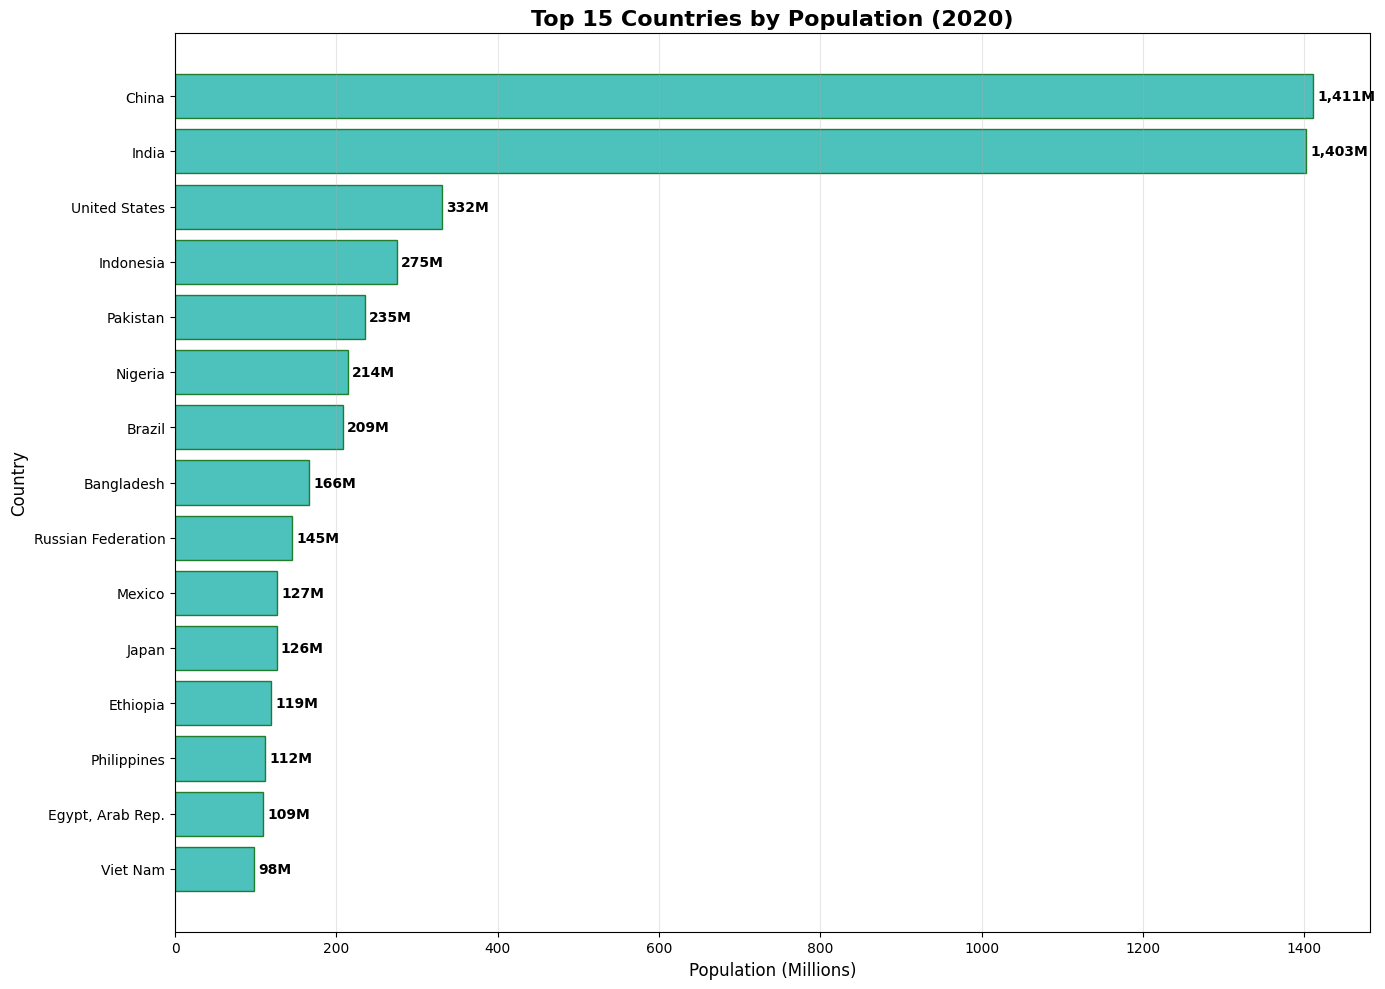


TOP 15 ACTUAL COUNTRIES BY POPULATION (2020):
 1. China               : 1,411.1 million
 2. India               : 1,402.6 million
 3. United States       : 331.6 million
 4. Indonesia           : 274.8 million
 5. Pakistan            : 235.0 million
 6. Nigeria             : 214.0 million
 7. Brazil              : 208.7 million
 8. Bangladesh          : 166.3 million
 9. Russian Federation  : 145.2 million
10. Mexico              : 126.8 million
11. Japan               : 126.3 million
12. Ethiopia            : 118.9 million
13. Philippines         : 112.1 million
14. Egypt, Arab Rep.    : 109.3 million
15. Viet Nam            : 98.1 million


In [14]:
regions_to_exclude = [
    'Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
    'Early-demographic dividend', 'East Asia & Pacific', 
    'East Asia & Pacific (excluding high income)', 
    'East Asia & Pacific (IDA & IBRD countries)', 
    'Europe & Central Asia', 'Europe & Central Asia (excluding high income)',
    'Europe & Central Asia (IDA & IBRD countries)', 
    'European Union', 'Euro area', 'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)', 
    'High income', 'IBRD only', 'IDA & IBRD total', 'IDA blend',
    'IDA only', 'IDA total', 'Late-demographic dividend',
    'Latin America & Caribbean', 
    'Latin America & Caribbean (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Least developed countries: UN classification',
    'Low & middle income', 'Low income', 'Lower middle income',
    'Middle East & North Africa', 
    'Middle East, North Africa, Afghanistan & Pakistan',
    'Middle East, North Africa, Afghanistan & Pakistan (excluding high income)',
    'Middle East, North Africa, Afghanistan & Pakistan (IDA & IBRD)',
    'Middle income', 'North America', 'Not classified', 'OECD members',
    'Other small states', 'Pacific island small states',
    'Post-demographic dividend', 'Pre-demographic dividend',
    'Small states', 'South Asia', 'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa', 
    'Sub-Saharan Africa (excluding high income)',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Upper middle income', 'World',
    
    'Africa Eastern and Southern', 'Africa Western and Central',
    'Channel Islands'
]

countries_df = df[~df['Country Name'].isin(regions_to_exclude)].copy()

print(f"Total actual countries: {len(countries_df)}")
print(f"Total regional aggregates excluded: {len(df) - len(countries_df)}")

print(f"\nFIRST 20 ACTUAL COUNTRIES:")
print("=" * 25)
for i, country in enumerate(countries_df['Country Name'].head(20), 1):
    print(f"{i:2d}. {country}")

plt.figure(figsize=(14, 10))

top_n = 15
top_countries = countries_df.nlargest(top_n, '2020')[['Country Name', '2020']]

#Create the bar chart
bars = plt.barh(top_countries['Country Name'], top_countries['2020'] / 1e6, 
                color='lightseagreen', edgecolor='darkgreen', alpha=0.8)

plt.title(f'Top {top_n} Countries by Population (2020)', fontsize=16, fontweight='bold')
plt.xlabel('Population (Millions)', fontsize=12)
plt.ylabel('Country', fontsize=12)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{width:,.0f}M', ha='left', va='center', fontweight='bold')

plt.gca().invert_yaxis()

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTOP {top_n} ACTUAL COUNTRIES BY POPULATION (2020):")
print("=" * 55)
for i, (country, pop) in enumerate(zip(top_countries['Country Name'], top_countries['2020']), 1):
    print(f"{i:2d}. {country:20s}: {pop/1e6:,.1f} million")